## Imports

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from functools import reduce

## Read and explore Calender.csv

In [2]:
calender = pd.read_csv('data/calendar.csv', parse_dates=['date'])
print("Calender Sample")
calender.head()

Calender Sample


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [4]:
for (name, data) in calender.iteritems():
    print('Missing Values in Column ', name,": ", data.isnull().values.any())

Missing Values in Column  date :  False
Missing Values in Column  wm_yr_wk :  False
Missing Values in Column  weekday :  False
Missing Values in Column  wday :  False
Missing Values in Column  month :  False
Missing Values in Column  year :  False
Missing Values in Column  d :  False
Missing Values in Column  event_name_1 :  True
Missing Values in Column  event_type_1 :  True
Missing Values in Column  event_name_2 :  True
Missing Values in Column  event_type_2 :  True
Missing Values in Column  snap_CA :  False
Missing Values in Column  snap_TX :  False
Missing Values in Column  snap_WI :  False


In [5]:
events1 = calender[['event_type_1','event_name_1',]]
events1.columns = ["event_type","event_name"]
events2 = calender[['event_type_2','event_name_2',]]
events2.columns = ["event_type","event_name"]
events = pd.concat([events1,events2],ignore_index = True)
events = events.dropna()
print("Event Count w/Duplicates")
events.count()

Event Count w/Duplicates


event_type    167
event_name    167
dtype: int64

In [6]:
events_dict = {k: g["event_name"].tolist() for k,g in events.groupby("event_type")}
print("Event List w/Duplicates, Grouped by Event Type")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/Duplicates, Grouped by Event Type


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,SuperBowl
4,Father's day,ColumbusDay,Pesach End,NBAFinalsStart
5,Halloween,VeteransDay,Ramadan starts,NBAFinalsEnd
6,ValentinesDay,Thanksgiving,Eid al-Fitr,SuperBowl
7,StPatricksDay,Christmas,EidAlAdha,NBAFinalsStart
8,Easter,NewYear,Chanukah End,NBAFinalsEnd
9,Cinco De Mayo,MartinLutherKingDay,OrthodoxChristmas,SuperBowl


In [7]:
events_dict = {k: g["event_type"].tolist() for k,g in events.groupby("event_name")}
print("Event List w/Duplicates, Grouped by Event Name")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/Duplicates, Grouped by Event Name


,Chanukah End,Christmas,Cinco De Mayo,ColumbusDay,Easter,Eid al-Fitr,EidAlAdha,Father's day,Halloween,IndependenceDay,...,OrthodoxEaster,Pesach End,PresidentsDay,Purim End,Ramadan starts,StPatricksDay,SuperBowl,Thanksgiving,ValentinesDay,VeteransDay
0,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
1,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
2,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
3,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
4,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
5,NaN,NaN,Cultural,NaN,Cultural,NaN,NaN,Cultural,NaN,NaN,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,NaN,Cultural,NaN


In [8]:
events = events.drop_duplicates()
print("Event Count w/o Duplicates")
events.count()

Event Count w/o Duplicates


event_type    30
event_name    30
dtype: int64

In [9]:
events_dict = {k: g["event_name"].tolist() for k,g in events.groupby("event_type")}
print("Event List w/o Duplicates")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/o Duplicates


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,NaN
4,Father's day,ColumbusDay,Pesach End,NaN
5,Halloween,VeteransDay,Ramadan starts,NaN
6,Easter,Thanksgiving,Eid al-Fitr,NaN
7,NaN,Christmas,EidAlAdha,NaN
8,NaN,NewYear,Chanukah End,NaN
9,NaN,MartinLutherKingDay,OrthodoxChristmas,NaN


In [10]:
snap_data = calender.groupby(['year','month'])['snap_CA','snap_TX','snap_WI'].sum().reset_index()
print("SNAP days for each month across the years for all the states")
snap_data.pivot(index="month",columns = "year",values = ["snap_CA","snap_TX","snap_WI"])

SNAP days for each month across the years for all the states


snap_CA                               snap_TX                          \
year     2011  2012  2013  2014  2015  2016    2011  2012  2013  2014  2015   
month                                                                         
1         0.0  10.0  10.0  10.0  10.0  10.0     0.0  10.0  10.0  10.0  10.0   
2        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
3        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
4        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
5        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
6        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
7        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
8        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
9        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
10       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
11       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
12       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   

            snap_WI                                
year   2016    2011  2012  2013  2014  2015  2016  
month                                              
1      10.0     0.0  10.0  10.0  10.0  10.0  10.0  
2      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
3      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
4      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
5      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
6      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
7       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
8       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
9       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
10      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
11      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
12      NaN    10.0  10.0  10.0  10.0  10.0   NaN

## Read and explore sales_train_validation.csv

In [11]:
sales = pd.read_csv('data/sales_train_validation.csv')
print("Sales Data Sample")
sales.head()

Sales Data Sample


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [12]:
missing = 0
# print(sales.count())
for (name, data) in sales.iteritems():
    if(data.isnull().values.any()):
        print('Missing Values in Column ', name)
        missing = 1
if (not missing):
    print("No Missing Values!")

No Missing Values!


In [13]:
date = [col for col in sales if col.startswith('d_')]
sales['total_sales'] = sales[date].sum(axis=1)

In [14]:
(sales.groupby('state_id').agg({"total_sales":"sum"})/sales.total_sales.sum() * 100).reset_index()

,state_id,total_sales
0,CA,43.649240
1,TX,28.767621
2,WI,27.583139


In [15]:
def pie_chart(data, labels, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(title,fontweight = "bold")
    ax.axis('equal')
    plt.show()
    fig.savefig(title+".pdf", bbox_inches = 'tight')

States:  ['CA' 'TX' 'WI']
States' Statistics: 
CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64


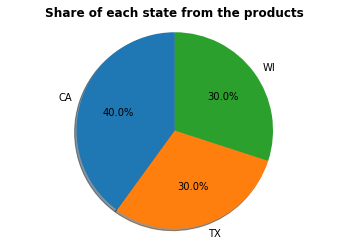

In [16]:
states = sales["state_id"].unique()
print("States: ", states)
states = sales["state_id"].value_counts()
print("States' Statistics: ")
print(states)
pie_chart(sales["state_id"].value_counts(),sales["state_id"].unique(),"Share of each state from the products")

Stores:  ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
Stores' Statistics: 
WI_1    3049
CA_3    3049
TX_3    3049
TX_2    3049
WI_2    3049
WI_3    3049
TX_1    3049
CA_2    3049
CA_4    3049
CA_1    3049
Name: store_id, dtype: int64


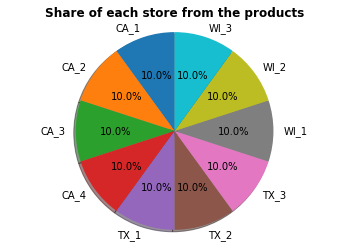

In [17]:
stores = sales["store_id"].unique()
print("Stores: ", stores)
stores = sales["store_id"].value_counts()
print("Stores' Statistics: ")
print(stores)
pie_chart(sales["store_id"].value_counts(),sales["store_id"].unique(),"Share of each store from the products")

Categories:  ['HOBBIES' 'HOUSEHOLD' 'FOODS']
Categories' Statistics: 
FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64


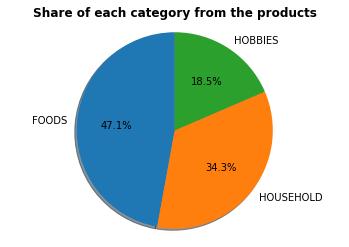

In [18]:
categories = sales["cat_id"].unique()
print("Categories: ", categories)
categories = sales["cat_id"].value_counts()
print("Categories' Statistics: ")
print(categories)
pie_chart(sales["cat_id"].value_counts(),sales["cat_id"].value_counts().index,"Share of each category from the products")

Departments:  ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']
Departments' Statistics: 
FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64


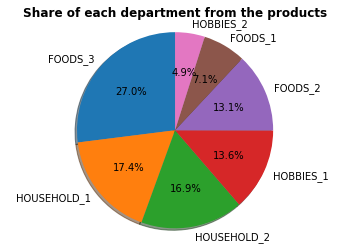

In [19]:
departments = sales["dept_id"].unique()
print("Departments: ", departments)
departments = sales["dept_id"].value_counts()
print("Departments' Statistics: ")
print(departments)
pie_chart(sales["dept_id"].value_counts(),sales["dept_id"].value_counts().index,"Share of each department from the products")

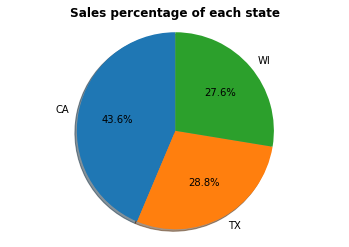

In [20]:
sales['total_sales'] = sales[date].sum(axis=1)
statewise_sales = (sales.groupby('state_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(statewise_sales['total_sales'], statewise_sales['state_id'], "Sales percentage of each state")

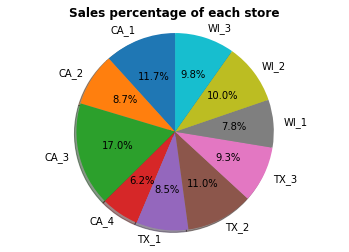

In [21]:
storewise_sales = (sales.groupby('store_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(storewise_sales['total_sales'], storewise_sales['store_id'], "Sales percentage of each store")

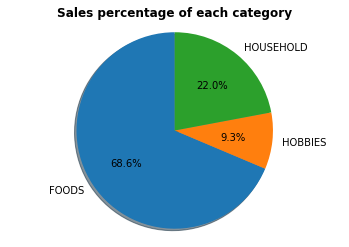

In [22]:
categoryewise_sales = (sales.groupby('cat_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(categoryewise_sales['total_sales'], categoryewise_sales['cat_id'], "Sales percentage of each category")

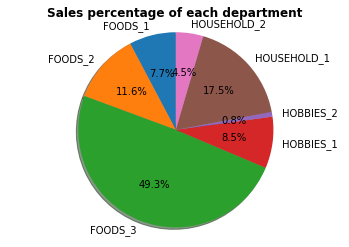

In [23]:
departmentewise_sales = (sales.groupby('dept_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(departmentewise_sales['total_sales'], departmentewise_sales['dept_id'], "Sales percentage of each department")

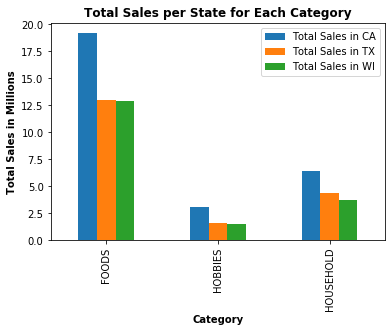

In [24]:
cat_state = sales.groupby(['cat_id','state_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per State for Each Category",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA', 'Total Sales in TX','Total Sales in WI'])
plt.savefig("Total Sales per State for Each Category.pdf", bbox_inches = 'tight')

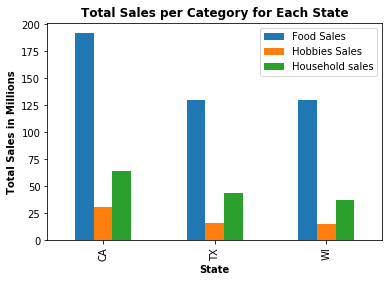

In [25]:
cat_state = sales.groupby(['state_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Category for Each State",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food Sales', 'Hobbies Sales','Household sales'])
plt.savefig("Total Sales per Category for each State.pdf", bbox_inches = 'tight')

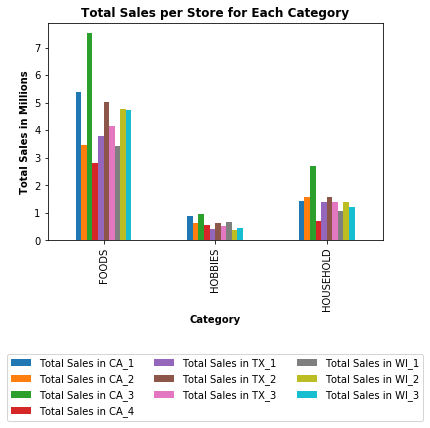

In [26]:
cat_state = sales.groupby(['cat_id','store_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per Store for Each Category",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA_1','Total Sales in CA_2','Total Sales in CA_3','Total Sales in CA_4', 'Total Sales in TX_1', 'Total Sales in TX_2', 'Total Sales in TX_3', 'Total Sales in WI_1', 'Total Sales in WI_2', 'Total Sales in WI_3'], loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.savefig("Total Sales per Store for Each Category.pdf", bbox_inches = 'tight')

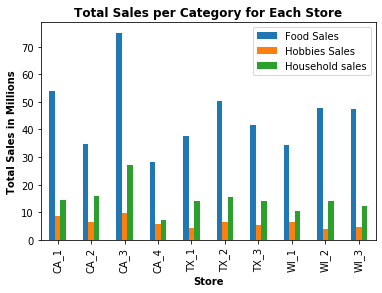

In [27]:
cat_state = sales.groupby(['store_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Category for Each Store",fontweight = "bold")
plt.xlabel("Store",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food Sales', 'Hobbies Sales','Household sales'])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
plt.savefig("Total Sales per Category for Each Store.pdf", bbox_inches = 'tight')

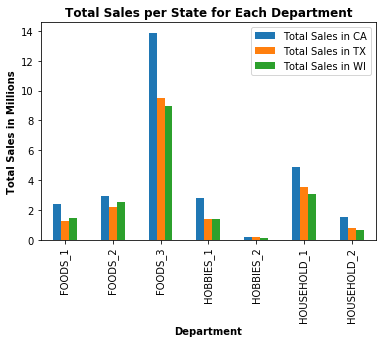

In [28]:
dept_state = sales.groupby(['dept_id','state_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per State for Each Department",fontweight = "bold")
plt.xlabel("Department",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA', 'Total Sales in TX','Total Sales in WI'])
plt.savefig("Total Sales per State for Each Department.pdf", bbox_inches = 'tight')

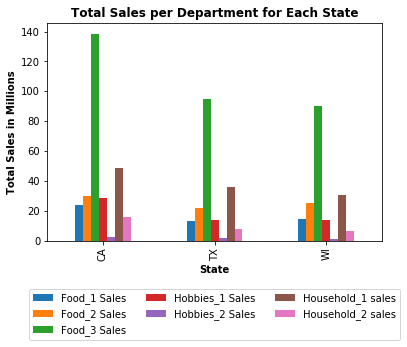

In [29]:
dept_state = sales.groupby(['state_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Department for Each State",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food_1 Sales', 'Food_2 Sales', 'Food_3 Sales', 'Hobbies_1 Sales', 'Hobbies_2 Sales','Household_1 sales', 'Household_2 sales'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3 )
plt.savefig("Total Sales per Department for each State.pdf", bbox_inches = 'tight')


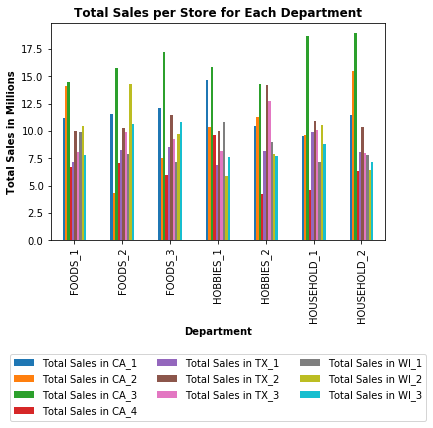

In [30]:
dept_state = sales.groupby(['dept_id','store_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 *x / float(x.sum())).unstack().plot(kind='bar')
plt.title("Total Sales per Store for Each Department",fontweight = "bold")
plt.xlabel("Department",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA_1','Total Sales in CA_2','Total Sales in CA_3','Total Sales in CA_4', 'Total Sales in TX_1', 'Total Sales in TX_2', 'Total Sales in TX_3', 'Total Sales in WI_1', 'Total Sales in WI_2', 'Total Sales in WI_3'], loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.savefig("Total Sales per Store for Each Department.pdf", bbox_inches = 'tight')

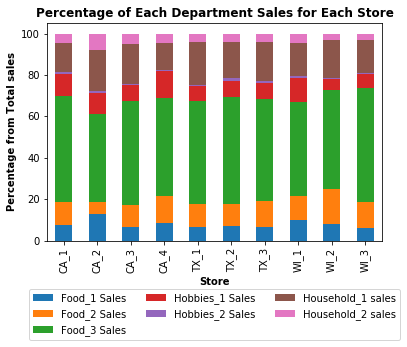

In [31]:
dept_state = sales.groupby(['store_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 *x / float(x.sum())).unstack().plot(kind='bar', stacked = True)
plt.title("Percentage of Each Department Sales for Each Store",fontweight = "bold")
plt.xlabel("Store",fontweight = "bold")
plt.ylabel("Percentage from Total sales",fontweight = "bold")
plt.legend(labels=['Food_1 Sales', 'Food_2 Sales', 'Food_3 Sales', 'Hobbies_1 Sales', 'Hobbies_2 Sales','Household_1 sales', 'Household_2 sales'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.savefig("Percentage of Each Department Sales for Each Store.pdf", bbox_inches = 'tight')

In [32]:
# def plot():
#     sns.set()
#     df_plot = df_time.resample('M').mean()
#     plt.plot(df_plot)
#     plt.title('Air polution by O3 and PM10')
#     plt.ylabel('micrograms per cubic meter (mg/m3)')
#     plt.xticks(rotation=45)
#     plt.show()
#     return

In [33]:
start_date = datetime(2011,1,29)
end_date = datetime(2016,6,19)

In [34]:
sales_ts = pd.DataFrame(sales[date].sum(axis =0),columns = ["total_sales"])
sales_ts['date'] = pd.date_range(start_date, periods=1913).tolist()
sales_ts.set_index('date', drop=True, inplace=True)
print("Sample from the sales time series")
sales_ts.head()

Sample from the sales time series


,total_sales
date,
2011-01-29,32631
2011-01-30,31749
2011-01-31,23783
2011-02-01,25412
2011-02-02,19146


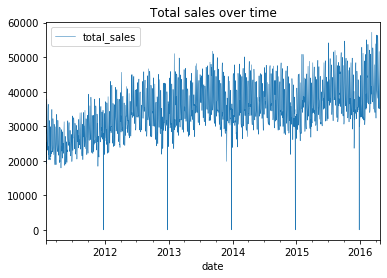

In [35]:
# sns.set(rc={'figure.figsize':(12, 5)})
sales_ts.plot(linewidth=0.5)
plt.title("Total sales over time")
plt.savefig("Total sales over time.pdf", bbox_inches = 'tight')

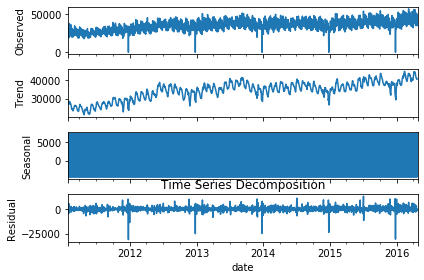

In [36]:
result = seasonal_decompose(sales_ts, model='additive')
result.plot()
plt.title("Time Series Decomposition")
plt.savefig("Time Series Decomposition.pdf", bbox_inches = 'tight')

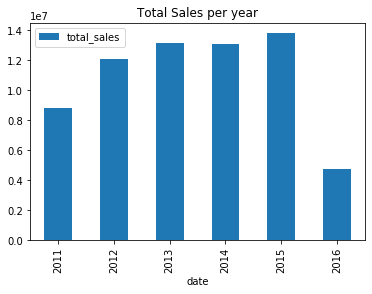

In [37]:
sales_ts.groupby(sales_ts.index.year).sum().plot(kind='bar')
plt.title("Total Sales per year")
plt.savefig("Total Sales per year.pdf", bbox_inches = 'tight')

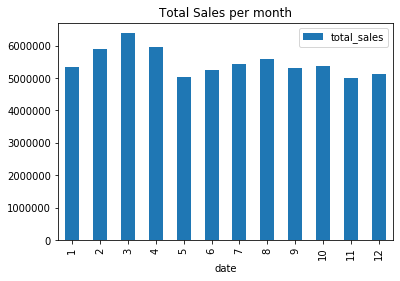

In [38]:
sales_ts.groupby(sales_ts.index.month).sum().plot(kind = "bar")
plt.title("Total Sales per month")
plt.savefig("Total Sales per month.pdf", bbox_inches = 'tight')

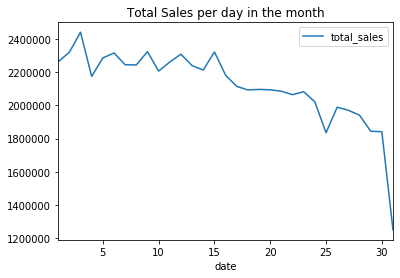

In [39]:
sales_ts.groupby(sales_ts.index.day).sum().plot()
plt.title("Total Sales per day in the month")
plt.savefig("Total Sales per day in the month.pdf")

In [40]:
x = pd.date_range(datetime(2011,1,1), periods=365)
dates = x.strftime('%m-%d')
# add missing values as nan
sales_2011 = [np.nan for i in range (28)]
sales_2011 = sales_2011 + sales_ts.loc[sales_ts.index.year == 2011].total_sales.tolist()
sales_2012 = sales_ts.loc[sales_ts.index.year == 2012].total_sales.tolist()
sales_2013 = sales_ts.loc[sales_ts.index.year == 2013].total_sales.tolist()
sales_2014 = sales_ts.loc[sales_ts.index.year == 2014].total_sales.tolist()
sales_2015 = sales_ts.loc[sales_ts.index.year == 2015].total_sales.tolist()
# add missing values as nan
sales_2016 = sales_ts.loc[sales_ts.index.year == 2016].total_sales.tolist() + [np.nan for i in range (365-115)]
# remove extra day, as 2012 is a leap year
del sales_2012[59]
sales_year_dict = {
    'date': dates,
    '2011': sales_2011,
   
    '2013' :  sales_2013,
    '2014' :  sales_2014,
    '2015' :  sales_2015,
    '2016' : sales_2016
}
sales_year = pd.DataFrame.from_dict(sales_year_dict).reset_index(drop = True).set_index('date', drop=True)
# events.append(pd.DataFrame(events2_dict).dropna())#subset=['event_name'])
print("Comparison of sales for each month in different years")
sales_year.head()

Comparison of sales for each month in different years


,2011,2013,2014,2015,2016
date,,,,,
01-01,NaN,24087,23845,26452,32651.0
01-02,NaN,32184,32653,39633,44737.0
01-03,NaN,36241,38870,41085,44340.0
01-04,NaN,33742,44616,39647,36693.0
01-05,NaN,43287,45302,34691,35306.0


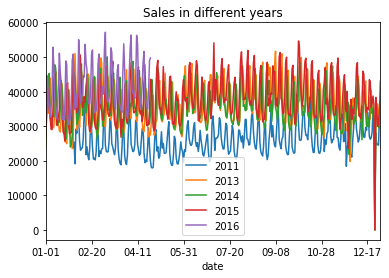

In [41]:
# sales_year = sales_year.groupby(pd.Grouper(freq='1M')).sum()
sales_year.plot()
plt.title("Sales in different years")
plt.savefig("Sales in different years.pdf", bbox_inches = 'tight')

In [42]:
events1_dict = {'date': calender['date'],
    'event_name':  calender['event_name_1'],
    'event_type':  calender['event_type_1']} #'date':  pd.to_datetime(calender['date']).apply(lambda x: x.date())
events2_dict = {'date': calender['date'],
    'event_name':  calender['event_name_2'],
    'event_type':  calender['event_type_2']}
events1 = pd.DataFrame(events1_dict).dropna()
events2 = pd.DataFrame(events2_dict).dropna()
# events.append(pd.DataFrame(events2_dict).dropna())#subset=['event_name'])
sales_events1 = pd.merge(sales_ts, events1, on=['date'])
sales_events1.set_index('date', drop=True, inplace=True)
print("Total sales on event days")
sales_events1.head()

Total sales on event days


,total_sales,event_name,event_type
date,,,
2011-02-06,32736,SuperBowl,Sporting
2011-02-14,21804,ValentinesDay,Cultural
2011-02-21,23966,PresidentsDay,National
2011-03-09,22560,LentStart,Religious
2011-03-16,22765,LentWeek2,Religious


In [43]:
sales_events2 = pd.merge(sales_ts, events2, on=['date'])
sales_events2.set_index('date', drop=True, inplace=True)
print("Total sales on event days")
sales_events2

Total sales on event days


,total_sales,event_name,event_type
date,,,
2011-04-24,24018,Easter,Cultural
2013-05-05,43203,Cinco De Mayo,Cultural
2014-04-20,38934,OrthodoxEaster,Religious
2014-06-15,42494,Father's day,Cultural


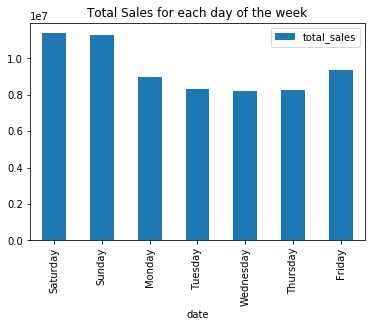

In [44]:
week_days = ['Sat', 'Sun', 'Mon','Tue','Wed','Thu','Fri']
sales_ts.groupby(sales_ts.index.weekday_name).sum().reindex(sales_ts.index.weekday_name.unique()).plot(kind = "bar")
plt.title("Total Sales for each day of the week")
plt.savefig("Total Sales for each day of the week.pdf", bbox_inches = 'tight')

### We next explore the effect of events on the year 2011

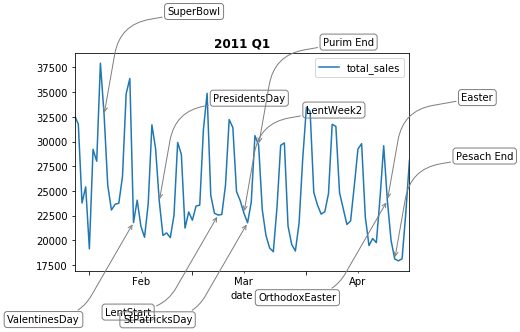

In [45]:
sales_2011 = sales_ts.loc['2011-01-29':'2011-04-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-01-29':'2011-04-30']
sales_events2_2011 = sales_events2.loc['2011-01-29':'2011-04-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
dates = sales_events2_2011.index.array
for i in range(sales_events2_2011.shape[0]):
    e = sales_events2_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"] + 10), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]+10), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))

#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q1",fontweight = "bold")
plt.savefig("2011 Q1.pdf", bbox_inches = 'tight')

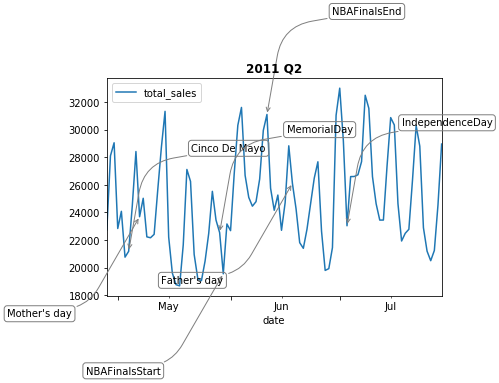

In [46]:
sales_2011 = sales_ts.loc['2011-04-29':'2011-07-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-04-29':'2011-07-30']
sales_events2_2011 = sales_events2.loc['2011-04-29':'2011-07-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2 == 1):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-100, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(100, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q2",fontweight = "bold")
plt.savefig("2011 Q2.pdf", bbox_inches = 'tight')

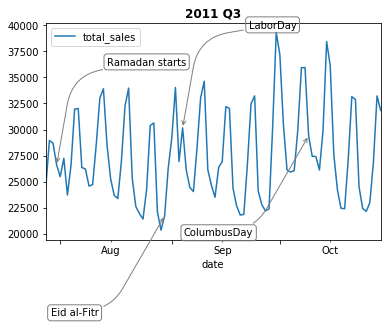

In [47]:
sales_2011 = sales_ts.loc['2011-07-29':'2011-10-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-07-29':'2011-10-30']
sales_events2_2011 = sales_events2.loc['2011-07-29':'2011-10-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q3",fontweight = "bold")
plt.savefig("2011 Q3.pdf", bbox_inches = 'tight')

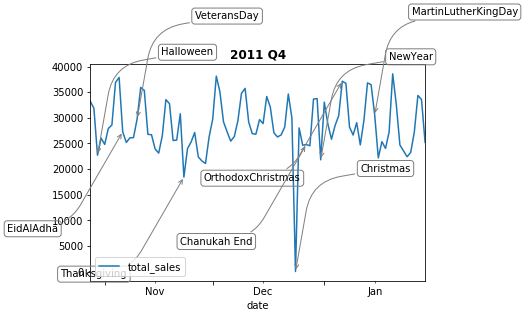

In [48]:
sales_2011 = sales_ts.loc['2011-10-29':'2012-01-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-10-29':'2012-01-30']
sales_events2_2011 = sales_events2.loc['2011-10-29':'2012-01-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q4",fontweight = "bold")
plt.savefig("2011 Q4.pdf", bbox_inches = 'tight')

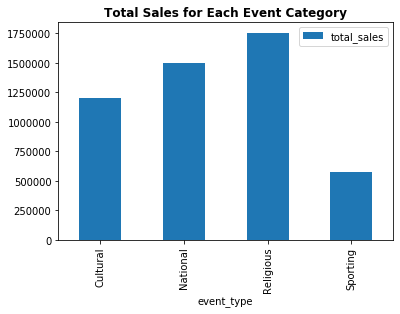

In [49]:
# gdf = sales_events1.groupby([sales_events1.index.month,'event_type']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x).unstack().plot(kind='bar')
gdf = sales_events1.groupby('event_type').agg({"total_sales":"sum"}).plot(kind='bar')
plt.title("Total Sales for Each Event Category",fontweight = "bold")
# plt.legend(labels=['Total Sales on Cultural Events Days','Total Sales on National Events Days','Total Sales on Religous Events Days','Total Sales on Sporting Events Days'])
plt.savefig("Total Sales for Each Event Category.pdf", bbox_inches = 'tight')

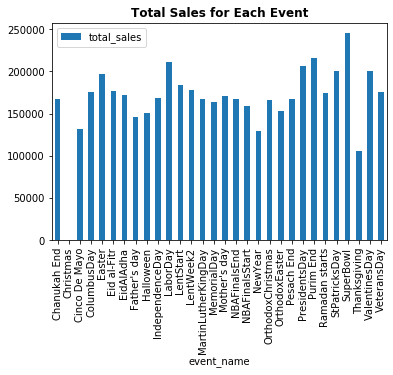

In [50]:
gdf = sales_events1.groupby('event_name').agg({"total_sales":"sum"}).plot(kind='bar')
plt.title("Total Sales for Each Event",fontweight = "bold")
plt.savefig("Total Sales for Each Event.pdf", bbox_inches = 'tight')

In [51]:
gdf = sales_events1.groupby(sales_events1.index.month)
# print("Group events by month")
# for key, item in gdf:
#     print(gdf.get_group(key), "\n\n")
print("Check the month with the most events")
gdf.count().sort_values('event_name',ascending = False)

Check the month with the most events


,total_sales,event_name,event_type
date,,,
2,27,27,27
3,17,17,17
5,16,16,16
1,15,15,15
6,15,15,15
10,13,13,13
4,11,11,11
11,11,11,11
12,10,10,10


In [52]:
sale_state = sales.groupby("state_id")[date].sum().reset_index().set_index('state_id').T
sale_state['date'] = pd.date_range(start_date, periods=1913).tolist()
sale_state.set_index('date', drop=True, inplace=True)
sale_state.sort_index(inplace=True)
print("Daily sales in each state")
sale_state.head(2000)

Daily sales in each state


state_id,CA,TX,WI
date,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-04-20,15148,9600,10595
2016-04-21,14488,9602,10943
2016-04-22,17095,10615,12807


Text(0.5, 1.0, 'Daily sales in each state')

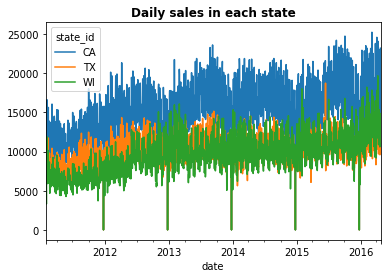

In [53]:
sale_state.plot()
plt.title("Daily sales in each state", fontweight = 'bold')

Text(0.5, 1.0, 'Daily sales in each state in 2011')

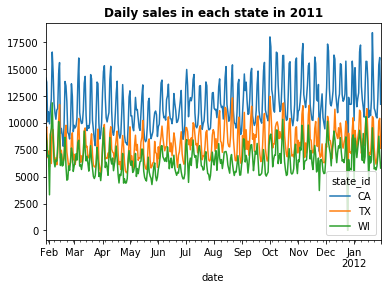

In [54]:
sale_state.loc['2011-01-29':'2012-01-30'].plot()
plt.title("Daily sales in each state in 2011", fontweight = 'bold')

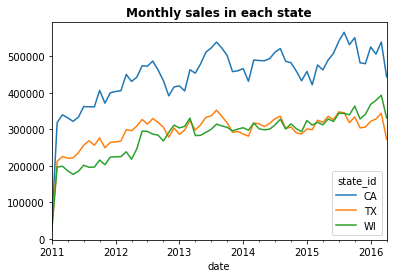

In [55]:
state_month = sale_state.groupby(pd.Grouper(freq='1M')).sum()
state_month.plot()
plt.title("Monthly sales in each state", fontweight = 'bold')
plt.savefig("Monthly sales in each state.pdf", bbox_inches = 'tight')

In [56]:
print("Monthly sales for CA, sorted descendingly")
state_month.sort_values(by ='CA' , ascending=False)

Monthly sales for CA, sorted descendingly


state_id,CA,TX,WI
date,,,
2015-08-31,565672,345213,343456
2015-10-31,551025,334063,363349
2015-07-31,540951,347507,343689
2016-03-31,538930,343674,393142
2013-08-31,538700,352173,313940
...,...,...,...
2011-06-30,332948,235653,184779
2011-04-30,331004,220681,186028
2011-05-31,321566,221620,176376


In [57]:
print("Monthly sales for TX, sorted descendingly")
state_month.sort_values(by ='TX' , ascending=False)

Monthly sales for TX, sorted descendingly


state_id,CA,TX,WI
date,,,
2013-08-31,538700,352173,313940
2015-07-31,540951,347507,343689
2015-08-31,565672,345213,343456
2016-03-31,538930,343674,393142
2013-07-31,522898,336647,299922
...,...,...,...
2011-03-31,339678,225162,198727
2011-05-31,321566,221620,176376
2011-04-30,331004,220681,186028


In [58]:
print("Monthly sales for WI, sorted descendingly")
state_month.sort_values(by ='WI' , ascending=False)

Monthly sales for WI, sorted descendingly


state_id,CA,TX,WI
date,,,
2016-03-31,538930,343674,393142
2016-02-29,505704,328110,379113
2016-01-31,525392,321790,368104
2015-10-31,551025,334063,363349
2015-07-31,540951,347507,343689
...,...,...,...
2011-08-31,361436,268649,195609
2011-04-30,331004,220681,186028
2011-06-30,332948,235653,184779


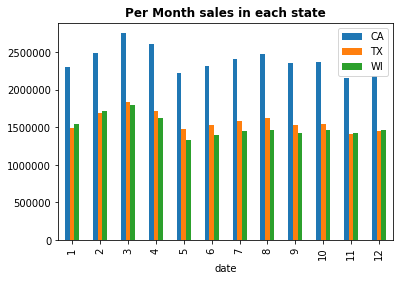

In [59]:
ca = state_month.groupby(state_month.index.month).agg({"CA":"sum"})
tx = state_month.groupby(state_month.index.month).agg({"TX":"sum"})
wi = state_month.groupby(state_month.index.month).agg({"WI":"sum"})
sales_month_state =  pd.merge(ca, tx, on=['date'])
sales_month_state =  pd.merge(sales_month_state, wi, on=['date'])
sales_month_state.plot(kind='bar')
plt.title("Per Month sales in each state", fontweight = 'bold')
plt.savefig("Per Month sales in each state.pdf", bbox_inches = 'tight')

Text(0.5, 1.0, 'Yearly sales in each state')

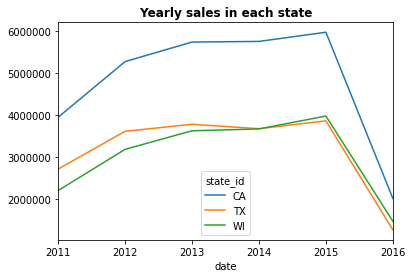

In [60]:
state_year = sale_state.groupby(pd.Grouper(freq='1Y')).sum()
state_year.plot()
plt.title("Yearly sales in each state", fontweight = 'bold')

In [61]:
sale_cat = sales.groupby("cat_id")[date].sum().reset_index().set_index('cat_id').T
sale_cat['date'] = pd.date_range(start_date, periods=1913).tolist()
sale_cat.set_index('date', drop=True, inplace=True)
sale_cat.sort_index(inplace=True)
print("Daily sales of each category")
sale_cat.head()

Daily sales of each category


cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729


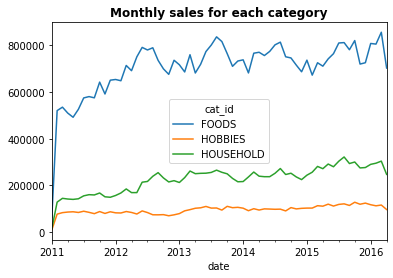

In [62]:
cat_month = sale_cat.groupby(pd.Grouper(freq='1M')).sum()
cat_month.plot()
plt.title("Monthly sales for each category", fontweight = 'bold')
plt.savefig("Monthly sales for each category.pdf", bbox_inches = 'tight')

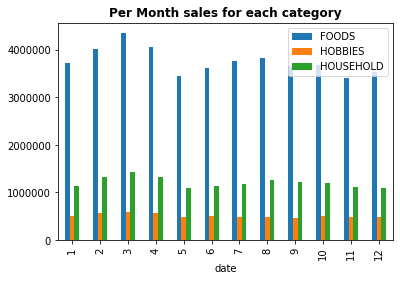

In [63]:
foods = cat_month.groupby(state_month.index.month).agg({"FOODS":"sum"})
hobbies = cat_month.groupby(state_month.index.month).agg({"HOBBIES":"sum"})
household = cat_month.groupby(state_month.index.month).agg({"HOUSEHOLD":"sum"})
sales_month_cat =  pd.merge(foods, hobbies, on=['date'])
sales_month_cat =  pd.merge(sales_month_cat, household, on=['date'])
sales_month_cat.plot(kind='bar')
plt.title("Per Month sales for each category", fontweight = 'bold')
plt.savefig("Per Month sales for each category.pdf", bbox_inches = 'tight')

In [64]:
sale_dept = sales.groupby("dept_id")[date].sum().reset_index().set_index('dept_id').T
sale_dept['date'] = pd.date_range(start_date, periods=1913).tolist()
sale_dept.set_index('date', drop=True, inplace=True)
sale_dept.sort_index(inplace=True)
print("Daily sales of each department")
sale_dept.head()

Daily sales of each department


dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
date,,,,,,,
2011-01-29,2343,4094,16741,3610,154,4105,1584
2011-01-30,2216,4209,16333,3172,185,3858,1776
2011-01-31,1657,3174,12343,2497,185,2827,1100
2011-02-01,1508,3606,13764,2531,138,2732,1133
2011-02-02,1209,2869,10525,1714,100,1802,927


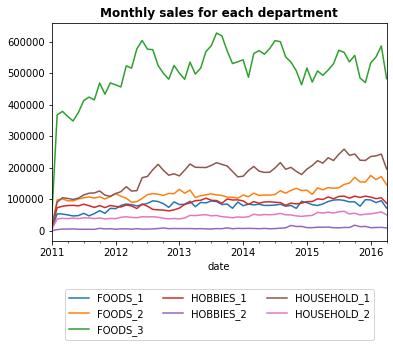

In [65]:
dept_month = sale_dept.groupby(pd.Grouper(freq='1M')).sum()
dept_month.plot()
plt.title("Monthly sales for each department", fontweight = 'bold')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.savefig("Monthly sales for each department.pdf", bbox_inches = 'tight')

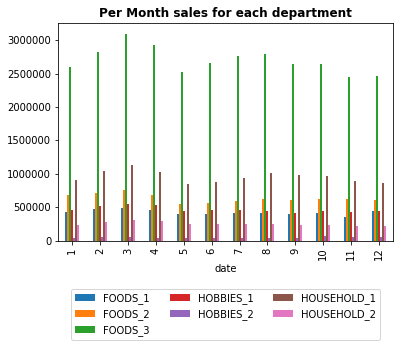

In [66]:
foods1 = dept_month.groupby(state_month.index.month).agg({"FOODS_1":"sum"})
foods2 = dept_month.groupby(state_month.index.month).agg({"FOODS_2":"sum"})
foods3 = dept_month.groupby(state_month.index.month).agg({"FOODS_3":"sum"})
hobbies1 = dept_month.groupby(state_month.index.month).agg({"HOBBIES_1":"sum"})
hobbies2 = dept_month.groupby(state_month.index.month).agg({"HOBBIES_2":"sum"})
household1 = dept_month.groupby(state_month.index.month).agg({"HOUSEHOLD_1":"sum"})
household2 = dept_month.groupby(state_month.index.month).agg({"HOUSEHOLD_2":"sum"})
# sales_month_cat =  pd.merge(foods, hobbies, on=['date'])
# sales_month_cat =  pd.merge(sales_month_cat, household, on=['date'])
dfs = [foods1, foods2, foods3, hobbies1, hobbies2, household1, household2]
sales_month_dept = reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)
sales_month_dept.plot(kind='bar')
plt.title("Per Month sales for each department", fontweight = 'bold')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.savefig("Per Month sales for each department.pdf", bbox_inches = 'tight')

## Import and explore sell_prices.csv

In [67]:
prices = pd.read_csv('data/sell_prices.csv')
print("Selling Prices Sample")
prices.head()

Selling Prices Sample


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [68]:
prices.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


In [69]:
prices_range = prices.groupby(["item_id","store_id"]).agg({"sell_price":["max","min","mean"]})
prices_range.columns = ['price_max','price_min', 'price_mean']
prices_range["price_change"] = prices_range["price_max"] - prices_range["price_min"]
prices_range_sorted = prices_range.sort_values(["price_change","item_id"],ascending=False).reset_index()
prices_range_sorted["category"] = prices_range_sorted["item_id"].str.split("_",expand = True)[0]
print("Prices sorted descendingly by price change")
prices_range_sorted.head()

Prices sorted descendingly by price change


,item_id,store_id,price_max,price_min,price_mean,price_change,category
0,HOUSEHOLD_2_406,WI_3,107.32,3.26,13.115872,104.06,HOUSEHOLD
1,HOUSEHOLD_2_406,WI_2,61.46,12.46,15.505142,49.00,HOUSEHOLD
2,HOUSEHOLD_2_466,TX_1,52.62,6.46,12.910214,46.16,HOUSEHOLD
3,HOUSEHOLD_2_178,TX_1,44.36,3.00,7.365714,41.36,HOUSEHOLD
4,HOUSEHOLD_2_250,WI_2,34.18,3.36,7.314504,30.82,HOUSEHOLD


In [70]:
print("No. of items with no price change in each category")
prices_range_sorted.loc[prices_range_sorted.price_change == 0].category.value_counts()

No. of items with no price change in each category


HOUSEHOLD    3497
FOODS        2907
HOBBIES      1843
Name: category, dtype: int64

In [71]:
print("No. of stores with no price change for each item")
prices_range_sorted.loc[prices_range_sorted.price_change == 0].item_id.value_counts()

No. of stores with no price change for each item


HOUSEHOLD_2_312    10
HOUSEHOLD_1_194    10
FOODS_2_387        10
HOUSEHOLD_1_024    10
HOUSEHOLD_1_262    10
                   ..
HOBBIES_1_031       1
FOODS_2_099         1
FOODS_2_388         1
FOODS_3_795         1
FOODS_2_313         1
Name: item_id, Length: 1281, dtype: int64

In [72]:
last_week = calender.loc[calender.d == "d_1913"].wm_yr_wk
select_prices = prices.sort_values(["item_id","store_id"],ascending=True)#.sell_price.tolist()
select_prices = select_prices[select_prices.wm_yr_wk <= int(last_week)]
select_prices["wm_yr_wk"] = select_prices["wm_yr_wk"] - 11101
# item_prices = [select_prices[x:x+240] for x in range(0, len(select_prices), 240)]
# item_prices = pd.DataFrame(item_prices)
select_prices.head(20)

,store_id,item_id,wm_yr_wk,sell_price
368746,CA_1,FOODS_1_001,0,2.0
368747,CA_1,FOODS_1_001,1,2.0
368748,CA_1,FOODS_1_001,2,2.0
368749,CA_1,FOODS_1_001,3,2.0
368750,CA_1,FOODS_1_001,4,2.0
368751,CA_1,FOODS_1_001,5,2.0
368752,CA_1,FOODS_1_001,6,2.0
368753,CA_1,FOODS_1_001,7,2.0
368754,CA_1,FOODS_1_001,8,2.0
368755,CA_1,FOODS_1_001,9,2.0


In [73]:
# df=pd.pivot_table(select_prices,index=["item_id","store_id"],columns=select_prices.groupby(["item_id","store_id"]).cumcount().add(0),values=['sell_price'])
# df.columns=df.columns.map('{0[0]}_{0[1]}'.format)
# # df.loc[(df.index.get_level_values('item_id') == "HOBBIES_1_002") &  (df.index.get_level_values("store_id") == "CA_1")]
# df.head(20)
selection = date.copy()
selection.insert(0, "item_id")
selection.insert(1,"store_id")
sales_selection = sales[selection].sort_values(["item_id","store_id"],ascending=True).set_index(["item_id","store_id"])
sales_selection = sales_selection.groupby(lambda x: int(int(x.split('_')[1])/7), axis=1).sum()
sales_selection = sales_selection.reset_index()
sales_selection = pd.melt(sales_selection, id_vars=["item_id","store_id"], value_vars=list(sales_selection.columns[2:]), var_name='wm_yr_wk', value_name='sales')
sales_selection.head()

,item_id,store_id,wm_yr_wk,sales
0,FOODS_1_001,CA_1,0,10
1,FOODS_1_001,CA_2,0,3
2,FOODS_1_001,CA_3,0,8
3,FOODS_1_001,CA_4,0,5
4,FOODS_1_001,TX_1,0,2


In [74]:
sales_prices = pd.merge(sales_selection, select_prices)
sales_prices["revenue"] = sales_prices.sales * sales_prices.sell_price
sales_prices.head()

,item_id,store_id,wm_yr_wk,sales,sell_price,revenue
0,FOODS_1_001,CA_1,0,10,2.0,20.0
1,FOODS_1_001,CA_2,0,3,2.0,6.0
2,FOODS_1_001,CA_3,0,8,2.0,16.0
3,FOODS_1_001,CA_4,0,5,2.0,10.0
4,FOODS_1_001,TX_1,0,2,2.0,4.0


In [75]:
sales_prices=pd.pivot_table(sales_prices,index=["item_id","store_id"],columns=sales_prices.groupby(["item_id","store_id"]).cumcount().add(0),values=['revenue'])
sales_prices.columns=sales_prices.columns.map('{0[0]}_{0[1]}'.format)
sales_prices.head()

revenue_0  revenue_1  revenue_2  revenue_3  revenue_4  \
item_id     store_id                                                          
FOODS_1_001 CA_1           20.0       10.0       18.0       22.0       36.0   
            CA_2            6.0       34.0       28.0       50.0        4.0   
            CA_3           16.0       12.0       38.0       14.0       28.0   
            CA_4           10.0        2.0       10.0       10.0        8.0   
            TX_1            4.0        6.0        2.0       10.0        8.0   

                      revenue_5  revenue_6  revenue_7  revenue_8  revenue_9  \
item_id     store_id                                                          
FOODS_1_001 CA_1           24.0       14.0       10.0       12.0       10.0   
            CA_2           12.0       16.0       26.0       12.0       12.0   
            CA_3           44.0       14.0       14.0       16.0       32.0   
            CA_4           16.0       10.0       10.0        6.0       10.0   
            TX_1            0.0        8.0       24.0        6.0       10.0   

                      ...  revenue_147  revenue_148  revenue_149  revenue_150  \
item_id     store_id  ...                                                       
FOODS_1_001 CA_1      ...         2.24        11.20        13.44         8.96   
            CA_2      ...         6.72        26.88        15.68        15.68   
            CA_3      ...        36.00        16.00        26.00         6.00   
            CA_4      ...         0.00         2.24         2.24         4.48   
            TX_1      ...         4.48         8.96        11.20         4.48   

                      revenue_151  revenue_152  revenue_153  revenue_154  \
item_id     store_id                                                       
FOODS_1_001 CA_1             4.48         8.96         8.96        20.16   
            CA_2            35.84        17.92         4.48        15.68   
            CA_3             8.00        24.00        16.00         6.00   
            CA_4             2.24         2.24         2.24        13.44   
            TX_1             6.72         4.48        11.20         4.48   

                      revenue_155  revenue_156  
item_id     store_id                            
FOODS_1_001 CA_1            13.44         6.72  
            CA_2             2.24        15.68  
            CA_3            18.00         8.00  
            CA_4             0.00         0.00  
            TX_1            11.20        11.20  

[5 rows x 157 columns]

In [76]:
rev_date = [col for col in sales_prices if col.startswith('revenue_')]
sales_prices['total_revenue'] = sales_prices[rev_date].sum(axis=1)
sales_prices = sales_prices.reset_index()
sales_prices["cat_id"] = sales_prices["item_id"].str.split("_",expand = True)[0]
sales_prices["state_id"] = sales_prices["store_id"].str.split("_",expand = True)[0]
sales_prices.head()

,item_id,store_id,revenue_0,revenue_1,revenue_2,revenue_3,revenue_4,revenue_5,revenue_6,revenue_7,...,revenue_150,revenue_151,revenue_152,revenue_153,revenue_154,revenue_155,revenue_156,total_revenue,cat_id,state_id
0,FOODS_1_001,CA_1,20.0,10.0,18.0,22.0,36.0,24.0,14.0,10.0,...,8.96,4.48,8.96,8.96,20.16,13.44,6.72,1616.40,FOODS,CA
1,FOODS_1_001,CA_2,6.0,34.0,28.0,50.0,4.0,12.0,16.0,26.0,...,15.68,35.84,17.92,4.48,15.68,2.24,15.68,2397.60,FOODS,CA
2,FOODS_1_001,CA_3,16.0,12.0,38.0,14.0,28.0,44.0,14.0,14.0,...,6.00,8.00,24.00,16.00,6.00,18.00,8.00,2583.58,FOODS,CA
3,FOODS_1_001,CA_4,10.0,2.0,10.0,10.0,8.0,16.0,10.0,10.0,...,4.48,2.24,2.24,2.24,13.44,0.00,0.00,840.32,FOODS,CA
4,FOODS_1_001,TX_1,4.0,6.0,2.0,10.0,8.0,0.0,8.0,24.0,...,4.48,6.72,4.48,11.20,4.48,11.20,11.20,1163.52,FOODS,TX


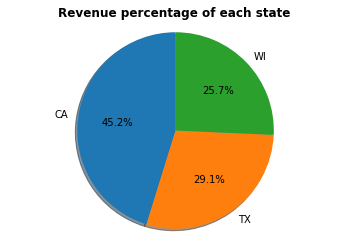

In [77]:
statewise_revenues = (sales_prices.groupby('state_id').agg({"total_revenue":"sum"})/sales_prices["total_revenue"].sum() * 100).reset_index()
pie_chart(statewise_revenues['total_revenue'], statewise_revenues['state_id'], "Revenue percentage of each state")

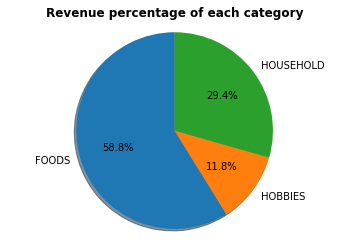

In [78]:
categoryewise_revenues = (sales_prices.groupby('cat_id').agg({"total_revenue":"sum"})/sales_prices["total_revenue"].sum() * 100).reset_index()
pie_chart(categoryewise_revenues['total_revenue'], categoryewise_revenues['cat_id'], "Revenue percentage of each category")

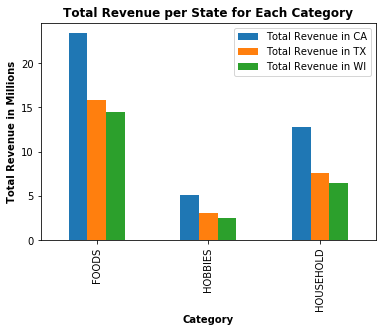

In [79]:
cat_state = sales_prices.groupby(['cat_id','state_id']).agg({"total_revenue":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Revenue per State for Each Category",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Revenue in Millions",fontweight = "bold")
plt.legend(labels=['Total Revenue in CA', 'Total Revenue in TX','Total Revenue in WI'])
plt.savefig("Total Revenue per State for Each Category.pdf")

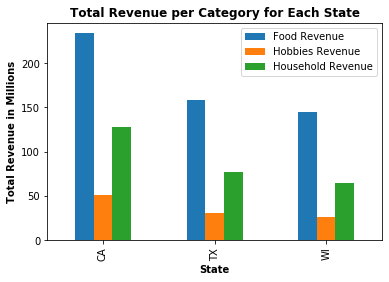

In [80]:
cat_state = sales_prices.groupby(['state_id','cat_id']).agg({"total_revenue":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Revenue per Category for Each State",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Revenue in Millions",fontweight = "bold")
plt.legend(labels=['Food Revenue', 'Hobbies Revenue','Household Revenue'])
plt.savefig("Total Revenue per Category for each State.pdf")

In [81]:
sales_prices_sorted = sales_prices.sort_values(["total_revenue","item_id"],ascending=False).reset_index()
print("Prices sorted descendingly by total revenue")
sales_prices_sorted.head()

Prices sorted descendingly by total revenue


,index,item_id,store_id,revenue_0,revenue_1,revenue_2,revenue_3,revenue_4,revenue_5,revenue_6,...,revenue_150,revenue_151,revenue_152,revenue_153,revenue_154,revenue_155,revenue_156,total_revenue,cat_id,state_id
0,6151,FOODS_3_120,CA_3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197541.66,FOODS,CA
1,5876,FOODS_3_090,CA_3,863.75,950.00,0.00,0.00,0.00,0.00,0.00,...,693.00,1123.32,997.74,1167.48,1139.04,1677.60,623.52,173741.55,FOODS,CA
2,10213,FOODS_3_586,TX_2,587.56,744.44,880.60,856.92,822.88,899.84,988.64,...,989.08,1023.84,1034.90,989.08,1001.72,1143.92,989.08,171385.16,FOODS,TX
3,6149,FOODS_3_120,CA_1,0.00,0.00,0.00,0.00,0.00,592.62,1987.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151387.02,FOODS,CA
4,10214,FOODS_3_586,TX_3,774.04,868.76,1120.36,979.76,1027.12,1061.16,1053.76,...,756.82,748.92,692.04,638.32,731.54,916.40,750.50,137892.80,FOODS,TX


In [82]:
sales_prices_sorted.tail()

,index,item_id,store_id,revenue_0,revenue_1,revenue_2,revenue_3,revenue_4,revenue_5,revenue_6,...,revenue_150,revenue_151,revenue_152,revenue_153,revenue_154,revenue_155,revenue_156,total_revenue,cat_id,state_id
26318,1189,FOODS_1_125,WI_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,FOODS,WI
26319,1126,FOODS_1_118,CA_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,FOODS,CA
26320,855,FOODS_1_089,CA_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,FOODS,CA
26321,501,FOODS_1_052,CA_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,FOODS,CA
26322,373,FOODS_1_039,TX_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,FOODS,TX


### SNAP days Exploration

In [83]:
snap_calender = calender[calender.index.values < 1913][["d", "snap_CA", "snap_TX", "snap_WI"]].set_index("d")
sales_snap = sales[["item_id","store_id"] + date].set_index(["item_id", "store_id"])

In [84]:
snap_CA = sales_snap.mul(pd.Series(snap_calender["snap_CA"])).sum(axis=1)
snap_TX = sales_snap.mul(pd.Series(snap_calender["snap_TX"])).sum(axis=1)
snap_WI = sales_snap.mul(pd.Series(snap_calender["snap_WI"])).sum(axis=1)
sales_snap['total_sales'] = sales_snap[date].sum(axis=1)
sales_snap["snap_CA"] = snap_CA
sales_snap["snap_TX"] = snap_TX
sales_snap["snap_WI"] = snap_WI
sales_snap = sales_snap.reset_index()
sales_snap["cat_id"] = sales_snap["item_id"].str.split("_",expand = True)[0]
sales_snap["state_id"] = sales_snap["store_id"].str.split("_",expand = True)[0]
sales_snap.loc[sales_snap['state_id'] != 'CA', 'snap_CA'] = 0
sales_snap.loc[sales_snap['state_id'] != 'TX', 'snap_TX'] = 0
sales_snap.loc[sales_snap['state_id'] != 'WI', 'snap_WI'] = 0
sales_snap['snap_sales'] = sales_snap["snap_CA"] + sales_snap["snap_TX"] + sales_snap["snap_WI"]
sales_snap['non_snap_sales'] = sales_snap["total_sales"] - sales_snap["snap_sales"]
print("Adding SNAP data to sales dataframe")
sales_snap.head()

Adding SNAP data to sales dataframe


,item_id,store_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1912,d_1913,total_sales,snap_CA,snap_TX,snap_WI,cat_id,state_id,snap_sales,non_snap_sales
0,HOBBIES_1_001,CA_1,0,0,0,0,0,0,0,0,...,1,1,600,194,0,0,HOBBIES,CA,194,406
1,HOBBIES_1_002,CA_1,0,0,0,0,0,0,0,0,...,0,0,493,166,0,0,HOBBIES,CA,166,327
2,HOBBIES_1_003,CA_1,0,0,0,0,0,0,0,0,...,1,1,288,91,0,0,HOBBIES,CA,91,197
3,HOBBIES_1_004,CA_1,0,0,0,0,0,0,0,0,...,7,2,3288,1089,0,0,HOBBIES,CA,1089,2199
4,HOBBIES_1_005,CA_1,0,0,0,0,0,0,0,0,...,2,4,1849,571,0,0,HOBBIES,CA,571,1278


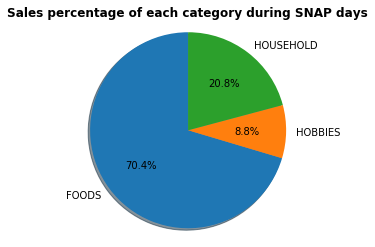

In [85]:
categoryewise_snap_sales = (sales_snap.groupby('cat_id').agg({"snap_sales":"sum"})/sales_snap["snap_sales"].sum() * 100).reset_index()
pie_chart(categoryewise_snap_sales['snap_sales'], categoryewise_snap_sales['cat_id'], "Sales percentage of each category during SNAP days")

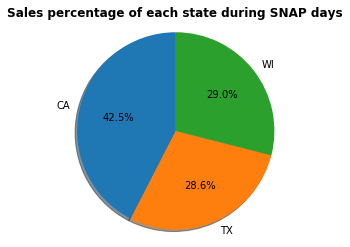

In [86]:
statewise_snap_sales = (sales_snap.groupby('state_id').agg({"snap_sales":"sum"})/sales_snap["snap_sales"].sum() * 100).reset_index()
pie_chart(statewise_snap_sales['snap_sales'], statewise_snap_sales['state_id'], "Sales percentage of each state during SNAP days")

In [87]:
cat_snap = sales_snap.groupby(['cat_id']).agg({"snap_sales":"sum", "total_sales":"sum"})
cat_snap["snap_percentage"] = 100* cat_snap["snap_sales"]/cat_snap["total_sales"]
print("Percentage of SNAP sales given a category")
cat_snap

Percentage of SNAP sales given a category


,snap_sales,total_sales,snap_percentage
cat_id,,,
FOODS,16474380,45089939,36.536709
HOBBIES,2049681,6124800,33.465272
HOUSEHOLD,4879304,14480670,33.695292


In [88]:
state_snap = sales_snap.groupby(['state_id']).agg({"snap_sales":"sum", "total_sales":"sum"})
state_snap["snap_percentage"] = 100* state_snap["snap_sales"]/state_snap["total_sales"]
print("Percentage of SNAP sales given a state")
state_snap

Percentage of SNAP sales given a state


,snap_sales,total_sales,snap_percentage
state_id,,,
CA,9936288,28675547,34.650736
TX,6686023,18899006,35.377644
WI,6781054,18120856,37.421268


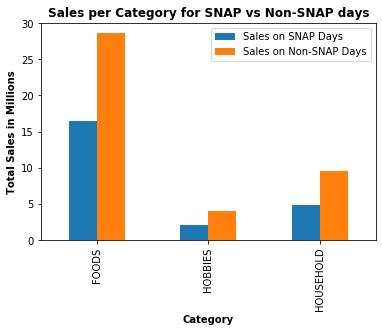

In [89]:
cat_snap = sales_snap.groupby(['cat_id']).agg({"snap_sales":"sum", "non_snap_sales":"sum"}).apply(lambda x: x / 1000000).plot(kind='bar')
plt.title("Sales per Category for SNAP vs Non-SNAP days",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Sales on SNAP Days', 'Sales on Non-SNAP Days'])
plt.savefig("Sales per Category for SNAP vs Non-SNAP days.pdf", bbox_inches = 'tight')

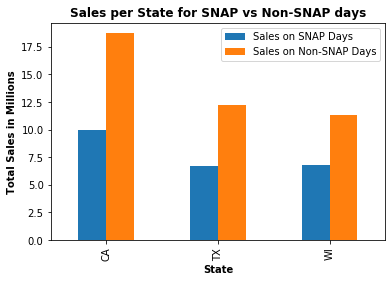

In [90]:
state_snap = sales_snap.groupby(['state_id']).agg({"snap_sales":"sum", "non_snap_sales":"sum"}).apply(lambda x: x / 1000000).plot(kind='bar')
plt.title("Sales per State for SNAP vs Non-SNAP days",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Sales on SNAP Days', 'Sales on Non-SNAP Days'])
plt.savefig("Sales per State for SNAP vs Non-SNAP days.pdf", bbox_inches = 'tight')